In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import integrate
from scipy import special

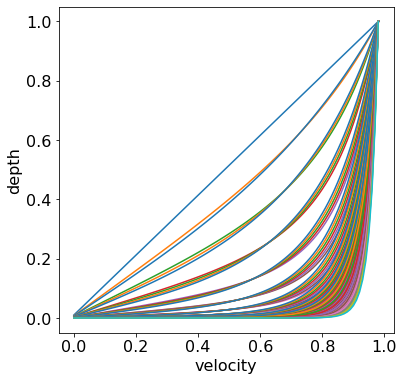

In [3]:


plt.rcParams['figure.figsize'] = [6, 6]
plt.rc('font', size = 16)
u_s = 1
du = 0.01
uu = np.arange(0,u_s,du)
d_lam = 1
lam_lim = 10
#lam_1, lam_2 = np.meshgrid(np.arange(-lam_lim,lam_lim,d_lam),np.arange(-lam_lim,lam_lim,d_lam))

lam_1 = np.arange(0,lam_lim,d_lam)
lam_2 = np.arange(0,lam_lim,d_lam)

u_lam = lam_1*0
#print(lam_1)
for lam1i in lam_1:
    for lam2j in lam_2:
        #print(lam1i)
        fu = np.exp(uu**2*lam1i + uu**3*lam2j) # distribution function
        fu /= np.trapz(fu)*du #normalizing
        #print(fu)
        zz = integrate.cumtrapz(fu)*du #solving differential equaiton to find velocity profile
        plt.plot(uu[0:-1],zz)
        plt.xlabel('velocity')
        plt.ylabel('depth')

        #u_lam[lami,lam2j] = 

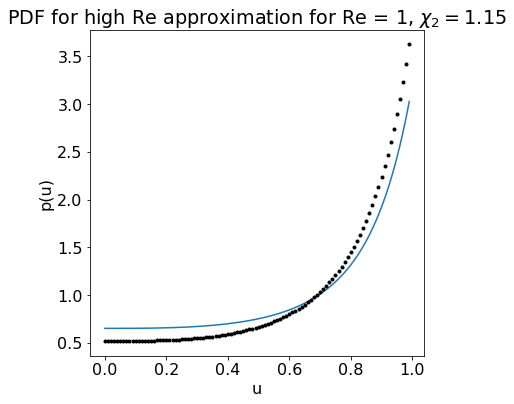

In [4]:
#showing the difference between the low Reynolds number distribution and the true distribution

Re = 1
a = 1/Re
b = 0
c = 2
constraints = b*uu**2 + c*uu**3
f_example = 1.4142*np.sqrt(a)*special.lambertw(2*a*np.exp(-2*constraints), k=0)**(-0.5)
f_approx = np.exp(constraints)
#normalizing
f_approx /= np.trapz(f_approx)*du
f_example /= np.trapz(f_example)*du

#nusselt profile
f_nusselt = (1-uu)**(-0.5)
f_nusselt /= np.trapz(f_nusselt)*du

plt.plot(uu,f_example)
plt.plot(uu,f_approx,'k .')
plt.xlabel('u')
plt.ylabel('p(u)')
plt.title('PDF for high Re approximation for Re = 1, $\\chi_2 = 1.15$')
#shape_factor:
ubar = np.trapz(f_example*uu)*du
chi2 = np.trapz(f_example*uu*uu)*du/ubar**2
#plt.plot(uu,f_nusselt)
#print(ubar)
#print('chi2 = ')
#print(chi2)

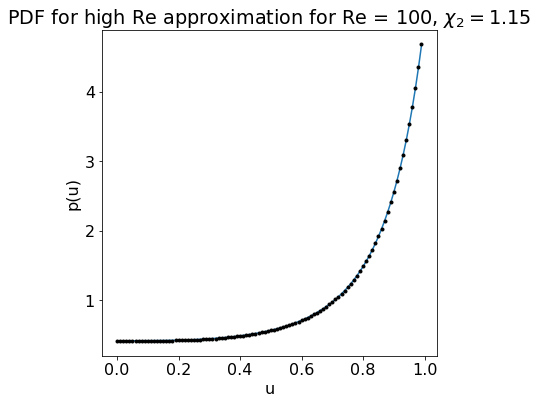

In [5]:
Re = 100
a = 1/Re
b = 0
c = 2.5
constraints = b*uu**2 + c*uu**3
f_example = 1.4142*np.sqrt(a)*special.lambertw(2*a*np.exp(-2*constraints), k=0)**(-0.5)
f_approx = np.exp(constraints)
#normalizing
f_approx /= np.trapz(f_approx)*du
f_example /= np.trapz(f_example)*du

#nusselt profile
f_nusselt = (1-uu)**(-0.5)
f_nusselt /= np.trapz(f_nusselt)*du

plt.plot(uu,f_example)
plt.plot(uu,f_approx,'k .')
plt.xlabel('u')
plt.ylabel('p(u)')
plt.title('PDF for high Re approximation for Re = 100, $\\chi_2 = 1.15$')
#shape_factor:
ubar = np.trapz(f_example*uu)*du
chi2 = np.trapz(f_example*uu*uu)*du/ubar**2
#plt.plot(uu,f_nusselt)
#print(ubar)
#print('chi2 = ')
#print(chi2)

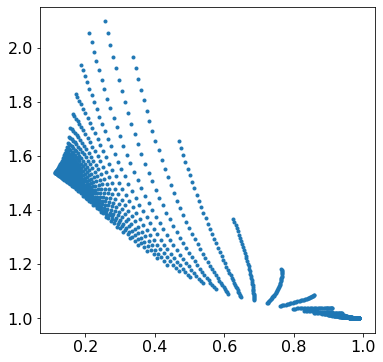

In [22]:
#parameter plot of \chi_2 against bar u 
u_s = 1
du = 0.001
uu = np.arange(0,u_s,du)
d_lam = 0.1
lam_lim_lower = 20
lam_lim_upper = 20
lam_1, lam_2 = np.meshgrid(np.arange(-lam_lim_lower,lam_lim_upper,d_lam),np.arange(-lam_lim_lower,lam_lim_upper,d_lam))

u_bar = np.ones(lam_1.shape)
chi2 = np.ones(lam_1.shape)

for i in range(0,lam_1.shape[0]):
    for j in range(0,lam_2.shape[1]):
        lam_1i = lam_1[i,j]
        lam_2j = lam_2[i,j]
        f = np.exp(-uu**2*lam_1i + uu**3*lam_2j)
        f /= np.trapz(f)*du #normalizing
        #finding mean velocity:
        #print(np.trapz(f*uu)*du)
        
        u_bar[i,j] = np.trapz(f*uu)*du
        #print(u_bar[i,j])
        chi2[i,j] = np.trapz(f*uu*uu)*du/u_bar[i,j]**2
        

plt.plot(u_bar.flatten(),chi2.flatten(),'.')

